### **Mục lục**
##### [**1. Giới thiệu**](#01)
##### [**2. Mục tiêu**](#02)
##### [**3. Thực hành**](#03)
* [Tiền xử lý](#3.1)
* [Thực hiện tìm luật kết hợp](#3.2)
* [Chuỗi thời gian](#3.3)
##### [**4. Kết luận**](#04)


<a id="01"><h3><strong>1. Giới thiệu</strong></h3></a>


Mục này nằm trong chương 3 thuộc bài tập cuối kỳ bộ môn Khai phá dữ liệu lớp DDU1231. Thực hiện với bộ dữ liệu đặt phòng khách sạn (Hotel Booking Demand) dữ liệu được thu thập trong giai đoạn năm 2015 - 2017 từ hai khách sạn một là từ khách sạn thành phố và một khách sạn nghỉ dưỡng cả hai đều nằm ở Bồ Đào Nha

* Sinh viên thực hiện: **Nguyễn Đăng Tiến (3123580050)**
* Nhật ký thực hiện các chương
  * Chương 1: Thực hiện ngày 14/12/2025
  * Chương 2: Thực hiện ngày 14/12/2025
  * Chương 3: Thực hiện ngày 17/12/2025
  * Chương 4: Thực hiện ngày 17/12/2025

<a id="02"><h3><strong>2. Mục tiêu</strong></h3></a>


Thực hiện giải quyết các câu hỏi đặt ra trong bài tiểu luận:
* **Luật kết hợp**
  1. Những dịch vụ hoặc loại phòng nào có xu hướng được đặt cùng nhau và có thể tạo thành các luật kết hợp mạnh?
* **Chuỗi thời gian**
  2. Kết quả dự báo nhu cầu trong 30–90 ngày tới có thể hỗ trợ khách sạn tối ưu giá phòng, nhân sự và quản trị doanh thu như thế nào?


<a id="03"><h3><strong>3. Thực hành</strong></h3></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [26]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [27]:
df.shape

(119390, 32)

<a id="3.1"><h4><strong>3.1. Tiền xử lý</strong></h4></a>

#### **Mô tả các đặc trưng của bộ dữ liệu Hotel Booking Demand**
* **Đặc trưng về loại khách sạn**
  * `hotel` : Loại khách sạn: City Hotel hoặc Resort Hotel.
* **Đặc trưng về thời gian đặt phòng**
  * `is_canceled` : 1 = đặt phòng bị hủy, 0 = không hủy.
  * `lead_time` : Số ngày từ lúc đặt phòng đến ngày check-in.
  * `arrival_date_year` : Năm nhận phòng.
  * `arrival_date_month` : Tháng nhận phòng (January, February...).
  * `arrival_date_week_number` : Tuần trong năm (1–52).
  * `arrival_date_day_of_month` : Ngày trong tháng (1–31).
  * `stays_in_weekend_nights` : Số đêm lưu trú vào thứ 6–7.
  * `stays_in_week_nights` : Số đêm lưu trú vào các ngày trong tuần (Mon–Thu).
* **Đặc trưng về khách hàng**
  * `adults` : Số lượng người lớn.
  * `children` : Số lượng trẻ em.
  * `babies` : Số trẻ sơ sinh.
  * `meal` : Loại suất ăn (BB, HB, FB, SC…).
  * `country` : Quốc gia của khách (mã ISO).
  * `market_segment` : Phân khúc khách hàng (Online TA, Direct, Corporate…).
  * `distribution_channel` : Kênh phân phối (Direct, TA/TO…).
  * `is_repeated_guest` : 1 = khách quay lại, 0 = khách mới.
  * `previous_cancellations` : Số lần đặt trước đó bị hủy.
  * `previous_bookings_not_canceled` : Số đặt trước đó không bị hủy.
  * `reserved_room_type` : Loại phòng khách đặt.
  * `assigned_room_type` : Loại phòng được giao khi nhận phòng.
* **Đặc trưng về tài chính và giá phòng**
  * `booking_changes` : Số lần khách thay đổi đặt phòng.
  * `deposit_type` : Loại đặt cọc (No Deposit, Non Refund, Refundable).
  * `agent` : ID đại lý du lịch.
  * `company` : ID công ty (nếu đi theo đoàn công ty).
  * `adr` : Average Daily Rate: giá phòng trung bình mỗi đêm.
* **Đặc trưng về điều kiện đặt phòng**
  * `required_car_parking_spaces` : Số chỗ đỗ xe khách yêu cầu.
  * `total_of_special_requests` : Số yêu cầu đặc biệt (giường đôi, tầng cao…).
* **Đặc trưng về trạng thái đặt phòng**
  * `reservation_status` : Trạng thái: *Canceled*, *Check-Out*, *No-Show*.
  * `reservation_status_date` : Ngày ghi nhận trạng thái.


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [29]:
# -----------------------------
# 1. Xử lý missing values
# -----------------------------
df['children'].fillna(df['children'].median(), inplace=True) # Thay thế bằng median
df['babies'].fillna(df['babies'].median(), inplace=True) # Thay thế bằng Median
df['country'].fillna(df['country'].mode()[0], inplace=True) # Thay thế bằng Mode

# -----------------------------
# 2. Loại bỏ dữ liệu không hợp lệ
# -----------------------------
df = df[(df['adults'] + df['children'] + df['babies']) > 0] # Loại bỏ phòng không có khách

# -----------------------------
# 3. Outlier Filtering
# -----------------------------
def filter_by_quantile(df, col, low=0.005, high=0.995):
    q_low = df[col].quantile(low)
    q_high = df[col].quantile(high)
    return df[df[col].between(q_low, q_high)]

for col in ['adr', 'lead_time', 'stays_in_week_nights', 'stays_in_weekend_nights',
            'children', 'babies', 'adults']:
    df = filter_by_quantile(df, col)

# -----------------------------
# 4. Feature Engineering
# -----------------------------

# Tổng số ngày lưu trú / tổng số khách
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights'] # Tổng số đêm ở lại
df['total_guests'] = df['adults'] + df['children'] + df['babies'] # Tổng số khách

# Các biến dự báo mạnh
df['is_family_trip'] = (df['children'] + df['babies'] > 0).astype(int) # Chuyến đi gia đình hay không
df['has_previous'] = (df['previous_cancellations'] > 0).astype(int) # Có quay lại không
df['adr_per_guest'] = df['adr'] / df['total_guests'] # Gía phòng trung bình trên một người

# Phân nhóm lead time
df['lead_time_bucket'] = pd.cut(
    df['lead_time'],
    bins=[0, 30, 90, 180, 365, df['lead_time'].max()],
    labels=['0-30', '30-90', '90-180', '180-365', '365+'] # Nhóm đặt phòng trước
)

# Chuyển tháng sang số
df['arrival_month_num'] = pd.to_datetime(df['arrival_date_month'], format='%B').dt.month

# Tạo biến season
def get_season(month):
    if month in [12,1,2]: return 'Winter'
    if month in [3,4,5]: return 'Spring'
    if month in [6,7,8]: return 'Summer'
    return 'Fall'

df['season'] = df['arrival_month_num'].apply(get_season) # Mùa du lịch

# Tạo biến arrival weekday
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + "-" +
    df['arrival_month_num'].astype(str) + "-" +
    df['arrival_date_day_of_month'].astype(str)
)
df['arrival_weekday'] = df['arrival_date'].dt.weekday # Ngày trong tháng

# Xóa cột arrival_date vì không dùng cho model
df.drop(['arrival_date'], axis=1, inplace=True)

# -------------------------------
# 5. Loại bỏ cột không cần thiết
# -------------------------------
df.drop([
    'reservation_status', # Tiết lộ trước thông tin khi huấn luyện
    'reservation_status_date',
    'assigned_room_type',
    'company',
    'agent'
], axis=1, inplace=True)

# -----------------------------
# 6. Tách dữ liệu
# -----------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Tách dữ liệu với tỉ lệ train/test 80 - 29
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [30]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric:", num_cols) # Xác định cột số
print("Categorical:", cat_cols) # Xác định cột phân loại

Numeric: ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_stay', 'total_guests', 'is_family_trip', 'has_previous', 'adr_per_guest']
Categorical: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type', 'lead_time_bucket', 'season']


<a id="3.2"><h4><strong>3.2. Thực hiện tìm luật kết hợp</strong></h4></a>

**Những dịch vụ hoặc loại phòng nào có xu hướng được đặt cùng nhau và có thể tạo thành các luật kết hợp mạnh?**

In [31]:
q1_feature = ['reserved_room_type', 'meal', 'total_of_special_requests', 'required_car_parking_spaces'] # Lựa chọn đặc trưng dịch vụ
q1_df = df[q1_feature]
q1_df.head()

,reserved_room_type,meal,total_of_special_requests,required_car_parking_spaces
0,C,BB,0,0
2,A,BB,0,0
3,A,BB,0,0
4,A,BB,1,0
5,A,BB,1,0


In [32]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# ---------- 1. Dựng giao dịch----------
def make_transaction(row):
    items = []

    # Room type (customer intention)
    room = str(row["reserved_room_type"]).strip()
    items.append(f"ROOM_{room}")

    # Meal plan
    meal = str(row["meal"]).strip()
    items.append(f"MEAL_{meal}")

    # Special requests (service add-on proxy)
    req = int(row["total_of_special_requests"])
    items.append("REQ_YES" if req >= 1 else "REQ_NONE")

    # Parking
    parking = int(row["required_car_parking_spaces"])
    items.append("PARKING_YES" if parking > 0 else "PARKING_NO")

    return items

transactions = df.apply(make_transaction, axis=1).tolist()

# ---------- 3) One-hot encode transactions ----------
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
basket = pd.DataFrame(te_ary, columns=te.columns_)

# ---------- 4) Mine frequent itemsets ----------
# Start with 2% support; tune later if too few/many rules
min_support = 0.02
freq = apriori(basket, min_support=min_support, use_colnames=True)

freq["itemset_len"] = freq["itemsets"].apply(len)
freq2 = freq[freq["itemset_len"] >= 2].sort_values("support", ascending=False)

print("Top frequent itemsets (len>=2):")
print(freq2.head(15).to_string(index=False))

# ---------- 5) Generate association rules (KEEP ALL first) ----------
rules_all = association_rules(freq, metric="confidence", min_threshold=0.40).copy()

# Helpful columns
rules_all["antecedents_str"] = rules_all["antecedents"].apply(lambda s: ", ".join(sorted(list(s))))
rules_all["consequents_str"] = rules_all["consequents"].apply(lambda s: ", ".join(sorted(list(s))))

# ---------- 5A) Strong rules (generic, strict) ----------
strong_rules = rules_all[
    (rules_all["support"] >= 0.02) &
    (rules_all["confidence"] >= 0.60) &
    (rules_all["lift"] > 1.20)
].sort_values(["lift", "confidence", "support"], ascending=False)

print("\nTop strong rules (generic):")
print(strong_rules[[
    "antecedents_str", "consequents_str", "support", "confidence", "lift"
]].head(20).to_string(index=False))

# ---------- 6A) ROOM -> SERVICE rules (targeted for Q1, softer thresholds) ----------
is_room_ant = rules_all["antecedents"].apply(lambda s: any(str(x).startswith("ROOM_") for x in s))
is_service_con = rules_all["consequents"].apply(
    lambda s: any(str(x).startswith(("MEAL_", "REQ_", "PARKING_")) for x in s)
)

room_service_rules = rules_all[
    is_room_ant & is_service_con &
    (rules_all["support"] >= 0.01) &      # softer support to avoid empty
    (rules_all["confidence"] >= 0.40) &
    (rules_all["lift"] > 1.05)
].sort_values(["lift", "confidence", "support"], ascending=False)

print("\nTop ROOM -> SERVICE rules (Q1):")
print(room_service_rules[[
    "antecedents_str", "consequents_str", "support", "confidence", "lift"
]].head(20).to_string(index=False))

# ---------- 6B) SERVICE -> SERVICE rules (also Q1) ----------
is_service_ant = rules_all["antecedents"].apply(
    lambda s: any(str(x).startswith(("MEAL_", "REQ_", "PARKING_")) for x in s)
)

service_service_rules = rules_all[
    is_service_ant & is_service_con &
    (rules_all["support"] >= 0.01) &
    (rules_all["confidence"] >= 0.40) &
    (rules_all["lift"] > 1.05)
].sort_values(["lift", "confidence", "support"], ascending=False)

print("\nTop SERVICE -> SERVICE rules (Q1):")
print(service_service_rules[[
    "antecedents_str", "consequents_str", "support", "confidence", "lift"
]].head(20).to_string(index=False))

# ---------- 7) Save outputs ----------
strong_rules[[
    "antecedents_str", "consequents_str", "support", "confidence", "lift"
]].to_csv("q1_rules_strong_generic.csv", index=False)

room_service_rules[[
    "antecedents_str", "consequents_str", "support", "confidence", "lift"
]].to_csv("q1_rules_room_to_service.csv", index=False)

service_service_rules[[
    "antecedents_str", "consequents_str", "support", "confidence", "lift"
]].to_csv("q1_rules_service_to_service.csv", index=False)

print("\nSaved: q1_rules_strong_generic.csv")
print("Saved: q1_rules_room_to_service.csv")
print("Saved: q1_rules_service_to_service.csv")

Top frequent itemsets (len>=2):
 support                                itemsets  itemset_len
0.723341                   (MEAL_BB, PARKING_NO)            2
0.691280                    (ROOM_A, PARKING_NO)            2
0.562452                  (REQ_NONE, PARKING_NO)            2
0.540890                       (ROOM_A, MEAL_BB)            2
0.512581           (ROOM_A, MEAL_BB, PARKING_NO)            3
0.461336                     (MEAL_BB, REQ_NONE)            2
0.458684                      (ROOM_A, REQ_NONE)            2
0.443689          (ROOM_A, REQ_NONE, PARKING_NO)            3
0.438674         (MEAL_BB, REQ_NONE, PARKING_NO)            3
0.375719                   (REQ_YES, PARKING_NO)            2
0.351964             (ROOM_A, MEAL_BB, REQ_NONE)            3
0.338769 (ROOM_A, MEAL_BB, REQ_NONE, PARKING_NO)            4
0.313463                      (REQ_YES, MEAL_BB)            2
0.284668          (REQ_YES, MEAL_BB, PARKING_NO)            3
0.266057                       (REQ_YE

<a id="3.3"><h4><strong>3.3. Chuỗi thời gian</strong></h4></a>

In [33]:
# 0) Tạo arrival_date ở level booking
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + "-" +
    df['arrival_month_num'].astype(str) + "-" +
    df['arrival_date_day_of_month'].astype(str)
)

df['revenue'] = df['adr'] * df['total_stay'] # Doanh thu từng booking

# 1) Aggregate theo ngày
daily = (df.groupby('arrival_date')
           .agg(bookings=('hotel', 'count'), # Tổng số booking trong ngày
                total_stay=('total_stay', 'sum'),        # room_nights
                total_guests=('total_guests', 'sum'), # Tổng số lượng khách
                revenue=('revenue', 'sum'), # Doanh thu
                cancel_rate=('is_canceled', 'mean')) # Tỷ lệ hủy
           .reset_index())

# 2) Reindex để có đủ ngày
daily = daily.set_index('arrival_date').asfreq('D')
daily[['bookings','total_stay','total_guests','revenue']] = daily[['bookings','total_stay','total_guests','revenue']].fillna(0) # Fill bằng 0 nếu như ngày đó không có nhu cầu
daily['cancel_rate'] = daily['cancel_rate'].fillna(0) # Tương tự như trên
daily = daily.reset_index()

# 3) Tạo đặc trưng mới features
daily['weekday'] = daily['arrival_date'].dt.weekday  # Khác biệt ngày thường và cuối tuần
daily['month'] = daily['arrival_date'].dt.month # Tháng mùa vụ trong năm
daily['week'] = daily['arrival_date'].dt.isocalendar().week.astype(int) # Chu ky tuần
daily['is_weekend'] = daily['weekday'].isin([5,6]).astype(int) # Cao điểm du lịch

daily['season'] = daily['month'].apply(get_season) # Cao điểm và thấp điểm
daily = pd.get_dummies(daily, columns=['season'], drop_first=True)

# 4) Lag + Rolling
for lag in [7, 14, 30]: # Nhu cầu chịu ảnh hưởng bởi 1 tuần trước 2 tuần trước hay 1 tháng trước
    daily[f'room_nights_lag_{lag}'] = daily['total_stay'].shift(lag)

daily['room_nights_ma_7'] = daily['total_stay'].rolling(7).mean()
daily['room_nights_ma_30'] = daily['total_stay'].rolling(30).mean()

# 5) Drop NA sau khi tạo lag/rolling
daily = daily.dropna().reset_index(drop=True)

# 6) Split theo thời gian
train = daily[daily['arrival_date'] < '2017-07-01']
test  = daily[daily['arrival_date'] >= '2017-07-01']


In [45]:
# đảm bảo sắp xếp theo ngày
daily = daily.sort_values('arrival_date').reset_index(drop=True)

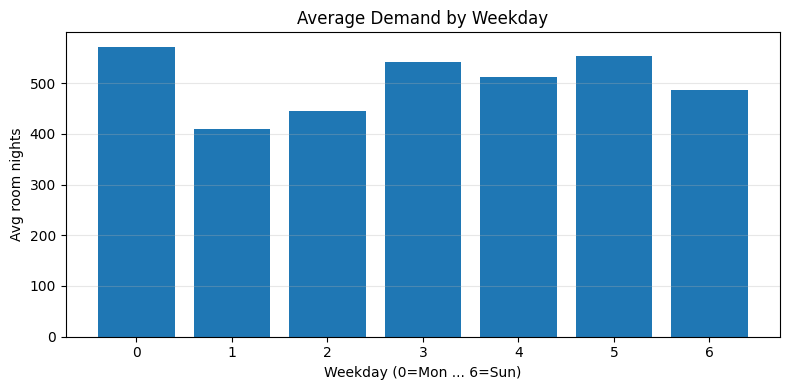

In [49]:
weekday_mean = daily.groupby('weekday')['total_stay'].mean().reindex(range(7))

plt.figure(figsize=(8,4))
plt.bar(weekday_mean.index, weekday_mean.values)
plt.title('Average Demand by Weekday')
plt.xlabel('Weekday (0=Mon ... 6=Sun)')
plt.ylabel('Avg room nights')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

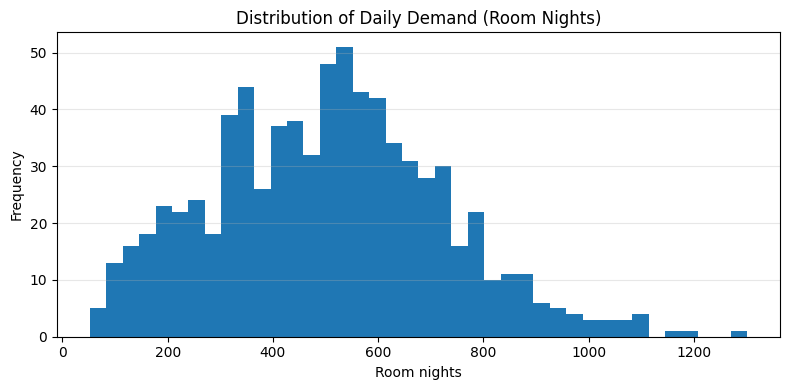

In [51]:
plt.figure(figsize=(8,4))
plt.hist(daily['total_stay'], bins=40)
plt.title('Distribution of Daily Demand (Room Nights)')
plt.xlabel('Room nights')
plt.ylabel('Frequency')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


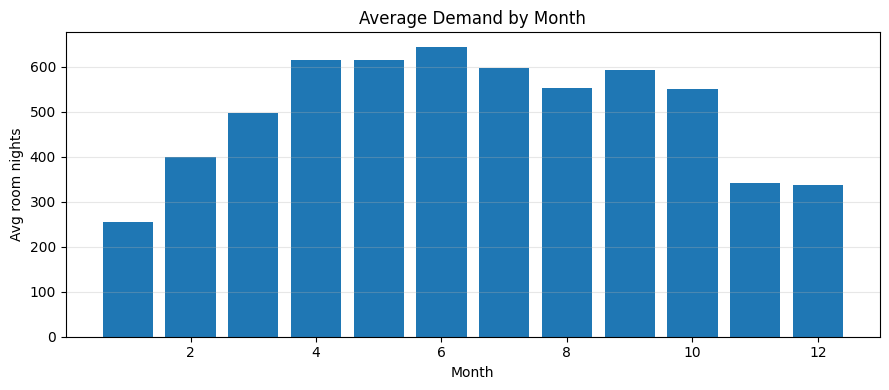

In [50]:
month_mean = daily.groupby('month')['total_stay'].mean().reindex(range(1,13))

plt.figure(figsize=(9,4))
plt.bar(month_mean.index, month_mean.values)
plt.title('Average Demand by Month')
plt.xlabel('Month')
plt.ylabel('Avg room nights')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


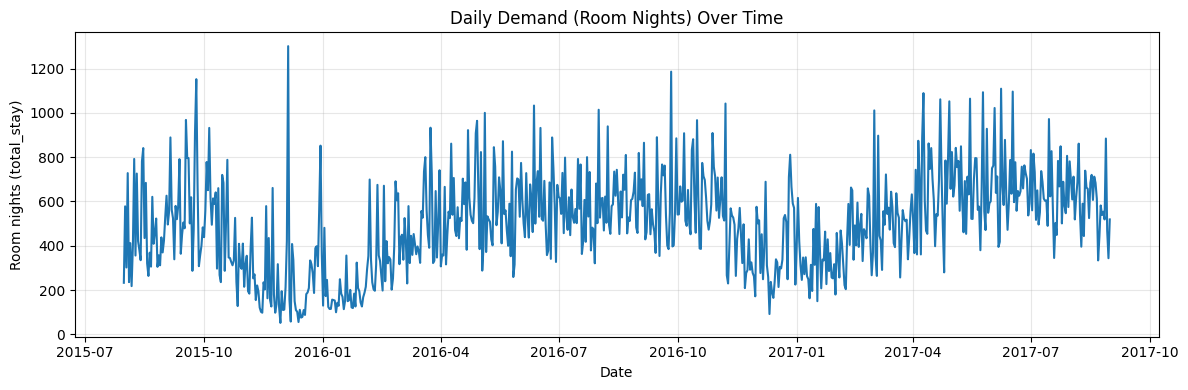

In [47]:
plt.figure(figsize=(12,4))
plt.plot(daily['arrival_date'], daily['total_stay'])
plt.title('Daily Demand (Room Nights) Over Time')
plt.xlabel('Date')
plt.ylabel('Room nights (total_stay)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [36]:
exog_cols = ['is_weekend', 'weekday', 'month']

from statsmodels.tsa.statespace.sarimax import SARIMAX

train = daily[daily['arrival_date'] < '2017-07-01']
test  = daily[daily['arrival_date'] >= '2017-07-01']

model_sarimax = SARIMAX(
    train['total_stay'],
    exog=train[exog_cols],
    order=(1,1,1),
    seasonal_order=(1,1,1,7),  # weekly seasonality
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarimax_fit = model_sarimax.fit(disp=False)

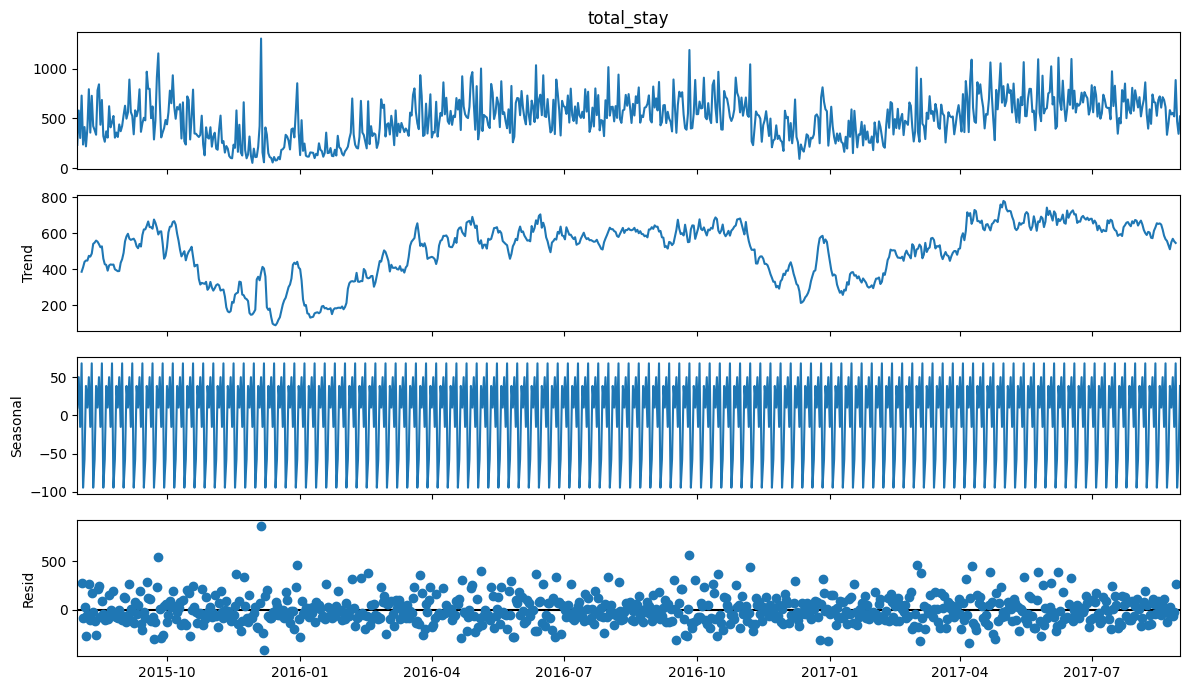

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts = daily.set_index('arrival_date')['total_stay']

# period=7 cho chu kỳ tuần (daily data)
decomp = seasonal_decompose(ts, model='additive', period=7)

fig = decomp.plot()
fig.set_size_inches(12, 7)
plt.tight_layout()
plt.show()


<Figure size 1000x400 with 0 Axes>

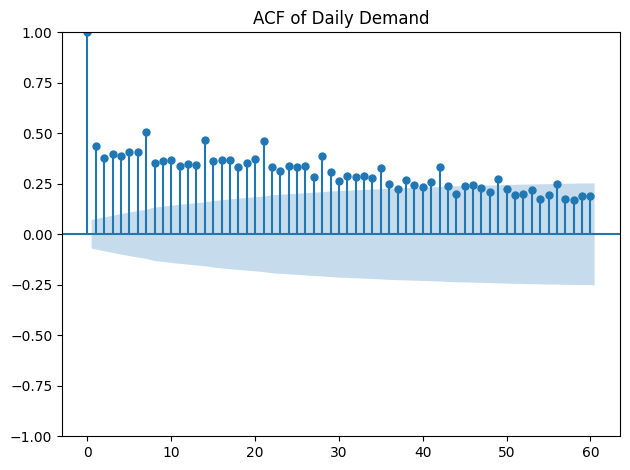

<Figure size 1000x400 with 0 Axes>

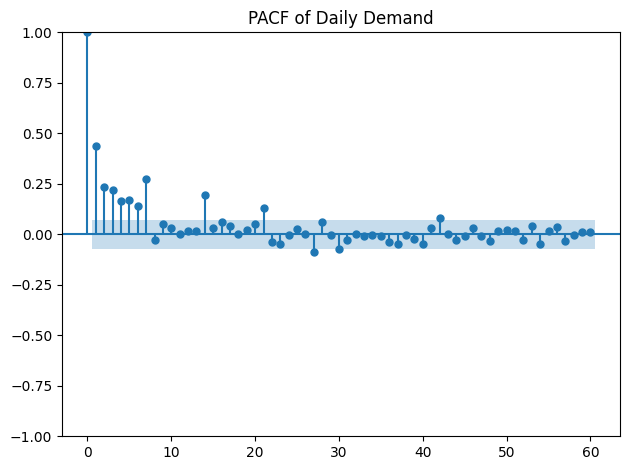

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ts = daily.set_index('arrival_date')['total_stay']

plt.figure(figsize=(10,4))
plot_acf(ts, lags=60)
plt.title('ACF of Daily Demand')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
plot_pacf(ts, lags=60, method='ywm')
plt.title('PACF of Daily Demand')
plt.tight_layout()
plt.show()


In [37]:
sarimax_forecast = sarimax_fit.forecast(
    steps=len(test),
    exog=test[exog_cols]
)

In [39]:
FEATURES = [
    'weekday', 'month', 'week', 'is_weekend',
    'room_nights_lag_7', 'room_nights_lag_14', 'room_nights_lag_30',
    'room_nights_ma_7', 'room_nights_ma_30',
    'season_Spring', 'season_Summer', 'season_Winter'
]

from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(
    train[FEATURES],
    train['total_stay']
)

xgb_pred = xgb.predict(test[FEATURES])


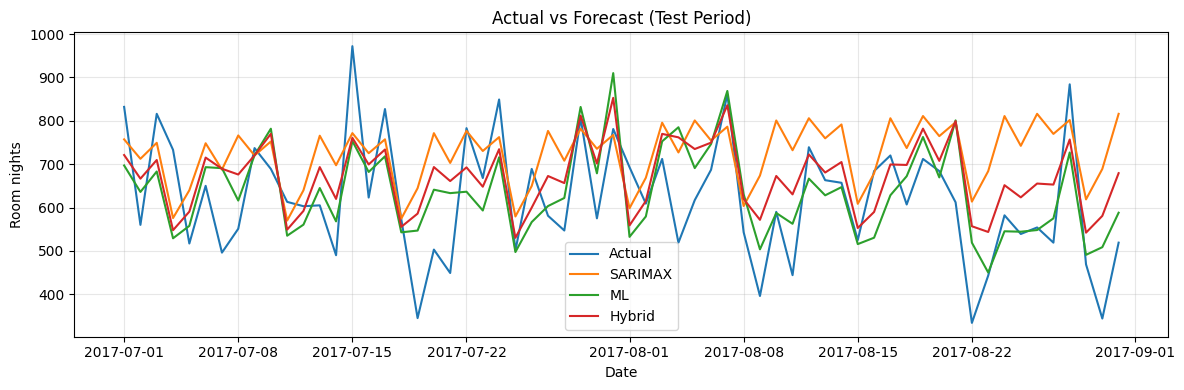

In [54]:
plt.figure(figsize=(12,4))
plt.plot(test['arrival_date'], test['total_stay'], label='Actual')
plt.plot(test['arrival_date'], sarimax_forecast, label='SARIMAX')
plt.plot(test['arrival_date'], xgb_pred, label='ML')
plt.plot(test['arrival_date'], hybrid_pred, label='Hybrid')

plt.title('Actual vs Forecast (Test Period)')
plt.xlabel('Date')
plt.ylabel('Room nights')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


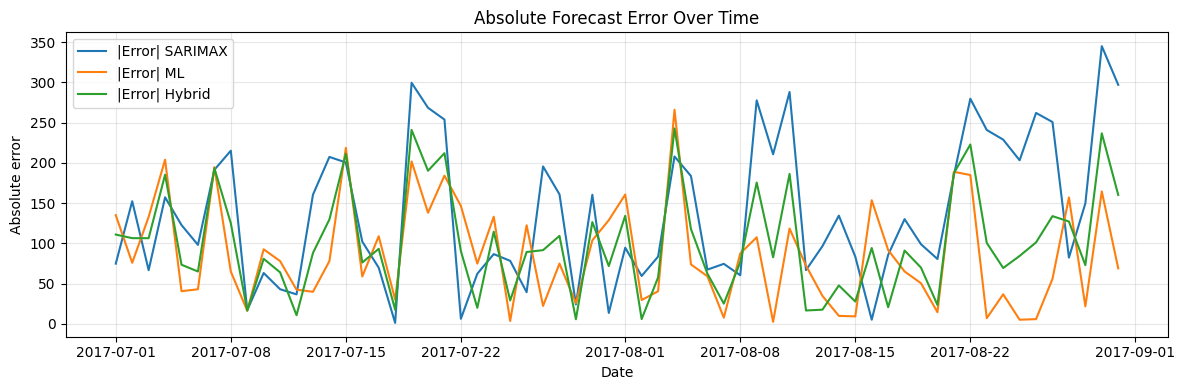

In [55]:
abs_err_sarimax = np.abs(test['total_stay'].values - np.array(sarimax_forecast))
abs_err_ml      = np.abs(test['total_stay'].values - np.array(xgb_pred))
abs_err_hybrid  = np.abs(test['total_stay'].values - np.array(hybrid_pred))

plt.figure(figsize=(12,4))
plt.plot(test['arrival_date'], abs_err_sarimax, label='|Error| SARIMAX')
plt.plot(test['arrival_date'], abs_err_ml, label='|Error| ML')
plt.plot(test['arrival_date'], abs_err_hybrid, label='|Error| Hybrid')

plt.title('Absolute Forecast Error Over Time')
plt.xlabel('Date')
plt.ylabel('Absolute error')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


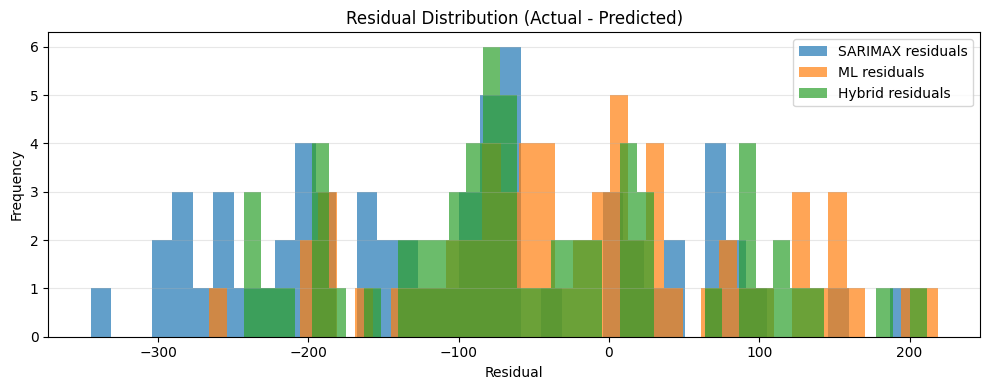

In [56]:
res_sarimax = test['total_stay'].values - np.array(sarimax_forecast)
res_ml      = test['total_stay'].values - np.array(xgb_pred)
res_hybrid  = test['total_stay'].values - np.array(hybrid_pred)

plt.figure(figsize=(10,4))
plt.hist(res_sarimax, bins=40, alpha=0.7, label='SARIMAX residuals')
plt.hist(res_ml, bins=40, alpha=0.7, label='ML residuals')
plt.hist(res_hybrid, bins=40, alpha=0.7, label='Hybrid residuals')

plt.title('Residual Distribution (Actual - Predicted)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(True, axis='y', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


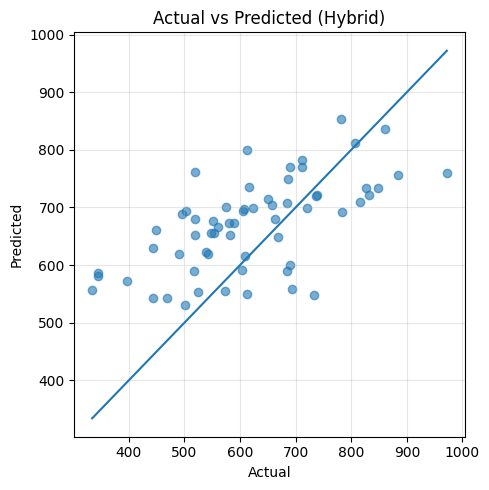

In [57]:
y_true = test['total_stay'].values
y_pred = np.array(hybrid_pred)

plt.figure(figsize=(5,5))
plt.scatter(y_true, y_pred, alpha=0.6)
minv = min(y_true.min(), y_pred.min())
maxv = max(y_true.max(), y_pred.max())
plt.plot([minv, maxv], [minv, maxv])  # đường y=x

plt.title('Actual vs Predicted (Hybrid)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


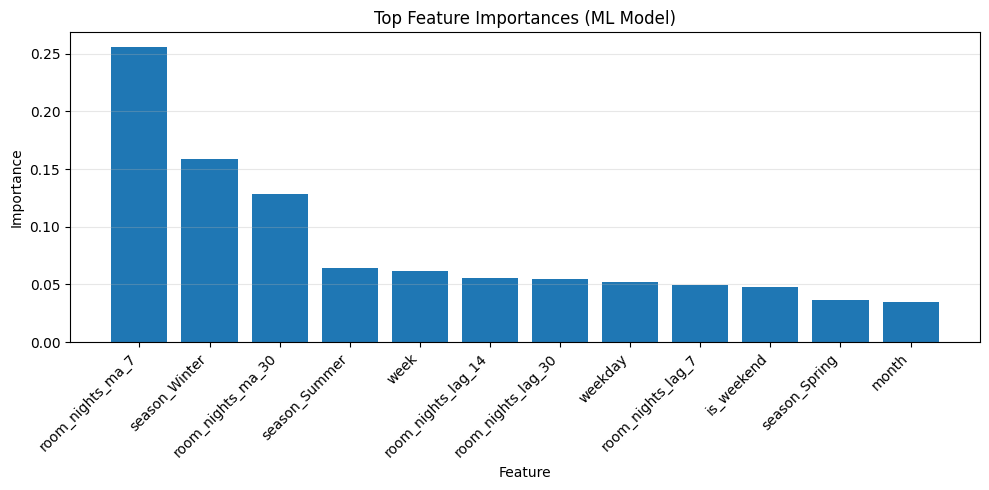

In [58]:
importances = xgb.feature_importances_
idx = np.argsort(importances)[::-1][:15]   # top 15

plt.figure(figsize=(10,5))
plt.bar(range(len(idx)), importances[idx])
plt.xticks(range(len(idx)), [FEATURES[i] for i in idx], rotation=45, ha='right')
plt.title('Top Feature Importances (ML Model)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


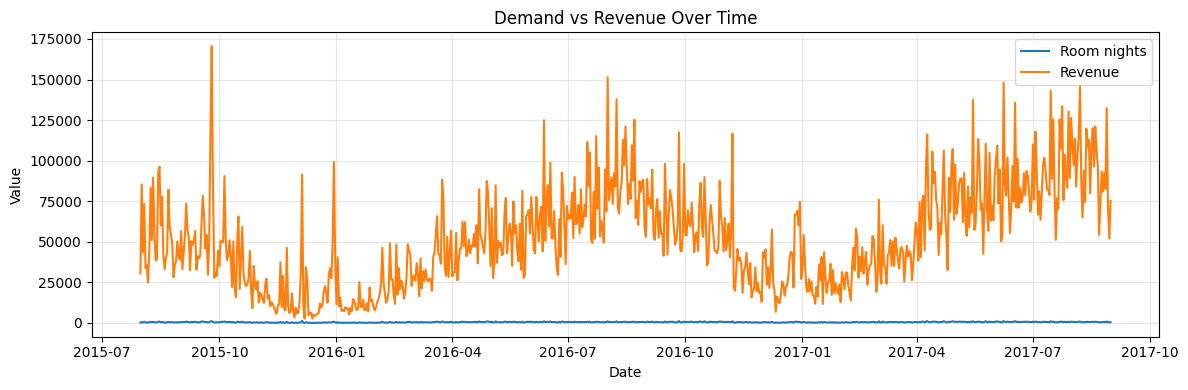

In [62]:
plt.figure(figsize=(12,4))
plt.plot(daily['arrival_date'], daily['total_stay'], label='Room nights')
plt.plot(daily['arrival_date'], daily['revenue'], label='Revenue')

plt.title('Demand vs Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [43]:
hybrid_pred = 0.4 * sarimax_forecast + 0.6 * xgb_pred

In [42]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

def evaluate(y_true, y_pred, name):
    print(name)
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("MAPE:", mean_absolute_percentage_error(y_true, y_pred))
    print("-----")

evaluate(test['total_stay'], sarimax_forecast, "SARIMAX")
evaluate(test['total_stay'], xgb_pred, "XGBoost")
evaluate(test['total_stay'], hybrid_pred, "HYBRID")


SARIMAX
MAE : 137.81921411204885
MAPE: 0.26135775213335843
-----
XGBoost
MAE : 86.612548828125
MAPE: 0.15084590017795563
-----
HYBRID
MAE : 100.35483870967742
MAPE: 0.1849179507191521
-----


<a id="04"><h3><strong>4. Kết luận</strong></h3></a>
